# Visualization Distribution SIT

## Import TOPAZ

In [1]:
import os
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import datetime
import pickle

In [2]:
from glob import glob

In [3]:
from src.data_preparation import load_data
from src.visualization import visualize_distri
from src.utils import modif_plot
from src.utils import tardisml_utils

rootdir = tardisml_utils.get_rootdir()

In [5]:
# glob glob 1 year. get distri HR, sit, and time_ypred
# glob glob serveral years? heavy ?

def get_files_HR(year=1992, extension='.pkl', ifolder=None):
    '''Glob glob files necessary for one year
    Returns files names to load_HR()
    '''
    
    if ifolder is None:
#         ifolder = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/'
        ifolder = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/'
    
    HR = glob(f'{ifolder}*HR*{year}*{extension}')[0]
    sit = glob(f'{ifolder}*sit_TP_*{year}*{extension}')[0]
    time_pred = glob(f'{ifolder}*time_pred*{year}*.npy')[0]

    return HR, sit, time_pred
    
    

In [12]:
# load HR - as .pkl
def load_HR(ncfile=None,
         pklfile_HR=None, pklfile_sit=None, ifolder='',
        as_pkl:bool=True, as_nc:bool=False):
    '''Load High Resolution SIT Distribution from ML
    either with .netcdf file or with .pickle files
    '''
    
    
    if ncfile is not None or as_nc:
        as_nc = True
        as_pkl = False
    
    if pklfile_HR is not None or as_pkl:
        as_pkl = True
        as_nc = False
    
    
    if as_pkl:
        ## Define files
        if pklfile_HR is None:
            pklfile_HR = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/sit_distri_HR_19920101_19920110.pkl'
            pklfile_sit = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/sit_19920101_19920110.pkl'
            ifolder = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/'
            file_time_pred = f'{ifolder}time_pred.npy'
            
        elif type(pklfile_HR) is str:  # an absolute path to the file to load
            ifolder = os.path.dirname(pklfile_HR) + '/'
            file_time_pred = f'{ifolder}time_pred.npy'
        elif type(pklfile_HR) is int:  # just a year
            pklfile_HR, pklfile_sit, file_time_pred = get_files_HR(pklfile_HR, ifolder=ifolder)
        
        
        ## LOAD
        with open(pklfile_HR, 'rb') as file: 
            sit_HR = pickle.load(file) 

        with open(pklfile_sit, 'rb') as file: 
            sit_t = pickle.load(file) 
        
        
#        import pdb; pdb.set_trace()
        # load dimensions
        time_pred = np.load(f'{file_time_pred}')
        
        y = np.load(f'{ifolder}y.npy')
        x = np.load(f'{ifolder}x.npy')
        all_time = np.load(f'{ifolder}all_time_19920101_19921231.npy')
            
        sit_HR = xr.DataArray(sit_HR, 
                            coords={'time_pred': time_pred, 'y': y, 'x': x, 'icecat': np.arange(5)}, 
                            dims=["time_pred", "y", "x", "icecat"])
            
        sit_t = xr.DataArray(sit_t, 
                            coords={'time': all_time, 'y': y, 'x': x}, 
                            dims=["time", "y", "x"])
            
        
    elif as_nc:
        if ncfile is None:
            ncfile = '/scratch/project_465000269/edelleo1/Leo/results/distri_230814-181425/ml/sit_distri_HR_20111201_20111204.nc'

        nc = nc4.Dataset(ncfile, mode='r')
        sit_HR = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['density_sit']
        sit_t = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit']
        
    
    
    # put nan instead of 0: easier to read
    sit_HR = sit_HR.where(~np.isnan(sit_t.isel(time=0)))
        
    return sit_HR, sit_t

In [22]:
sit_HR, sit_t = load_HR(as_nc=True)

In [41]:
sit_HR, sit_t = load_HR(as_pkl=True)

In [4]:
ifile_HR = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/sit_distri_HR_19920101_19921231.pkl'
ifile_sit = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/sit_19920101_19921231.pkl'
sit_HR, sit_t = load_HR(pklfile_HR=ifile_HR, pklfile_sit = ifile_sit)

> /tmp/ipykernel_59551/289871428.py(36)load()
     34         import pdb; pdb.set_trace()
     35         # load dimensions
---> 36         time_pred = np.load(f'{ifolder}time_pred.npy')
     37         y = np.load(f'{ifolder}y.npy')
     38         x = np.load(f'{ifolder}x.npy')

ipdb> ifolder
''
ipdb> os.path.dirname(pklfile_HR)
'/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml'
ipdb> ifolder = os.path.dirname(pklfile_HR) + '/'
ipdb> ifolder
'/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/'
ipdb> c


In [13]:
# ifolder = '/scratch/project_465000269/edelleo1/Leo/results/distri_240221-165255/ml/'
ifolder = '/scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/ml/'


sit_HR, sit_t = load_HR(pklfile_HR=1992, ifolder=ifolder)

> /tmp/ipykernel_252277/2533237500.py(52)load_HR()
     50         import pdb;pdb.set_trace()
     51 
---> 52         sit_HR = xr.DataArray(sit_HR, 
     53                             coords={'time_pred': time_pred, 'y': y, 'x': x, 'icecat': np.arange(5)},
     54                             dims=["time_pred", "y", "x", "icecat"])

ipdb> all_time
array(['1991-10-01T00:00:00.000000000', '1991-10-02T00:00:00.000000000',
       '1991-10-03T00:00:00.000000000', ...,
       '1999-03-29T00:00:00.000000000', '1999-03-30T00:00:00.000000000',
       '1999-03-31T00:00:00.000000000'], dtype='datetime64[ns]')
ipdb> c


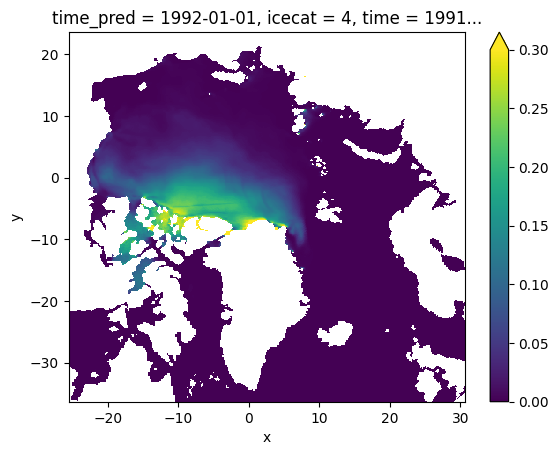

In [14]:
sit_HR.isel(time_pred=0,icecat=4).plot(vmax=0.3)

# __________________________________________________________

In [30]:
icecat0_m = sit_HR.isel(icecat=0).mean(('y','x'))
icecat1_m = sit_HR.isel(icecat=1).mean(('y','x'))
icecat2_m = sit_HR.isel(icecat=2).mean(('y','x'))
icecat3_m = sit_HR.isel(icecat=3).mean(('y','x'))
icecat4_m = sit_HR.isel(icecat=4).mean(('y','x'))

In [35]:
# load HR
# filename = '/scratch/project_465000269/edelleo1/Leo/results/distri_ml/ml/sit_HR.nc'
# real # filename = '/scratch/project_465000269/edelleo1/Leo/results/distri_230531-183924/ml/sit_distri_HR_20111201_20121201.nc'
#debug
# filename = '/scratch/project_465000269/edelleo1/Leo/results/distri_230531-183924/ml/sit_distri_HR_20111201_20111208.nc'
filename = '/scratch/project_465000269/edelleo1/Leo/results/distri_230814-181425/ml/sit_distri_HR_20111201_20111204.nc'

nc = nc4.Dataset(filename, mode='r')
sit_HR = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['density_sit']
sit_t = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit']


In [36]:
# put nan instead of 0: easier to read
sit_HR = sit_HR.where(~np.isnan(sit_t.isel(time=0)))

In [26]:
sit_HR.time_pred

<xarray.DataArray 'time_pred' (time_pred: 4)>
array(['2011-12-01T00:00:00.000000000', '2011-12-02T00:00:00.000000000',
       '2011-12-03T00:00:00.000000000', '2011-12-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_pred  (time_pred) datetime64[ns] 2011-12-01 2011-12-02 ... 2011-12-04
    time       datetime64[ns] 2011-10-01

In [27]:
sit_t0 = sit_t.isel(time=61)

sit=sit_t0

x, y = np.meshgrid(sit.x, sit.y)

In [37]:
ice0 = sit_HR.isel(icecat=0)
ice1 = sit_HR.isel(icecat=slice(None,1)).sum(dim='icecat')
ice2 = sit_HR.isel(icecat=slice(None,2)).sum(dim='icecat')
ice3 = sit_HR.isel(icecat=slice(None,3)).sum(dim='icecat')
ice4 = sit_HR.isel(icecat=slice(None,4)).sum(dim='icecat')

In [38]:
ice0 = ice0.where(~np.isnan(sit))
ice1 = ice1.where(~np.isnan(sit))
ice2 = ice2.where(~np.isnan(sit))
ice3 = ice3.where(~np.isnan(sit))
ice4 = ice4.where(~np.isnan(sit))

# __________________________________________________________

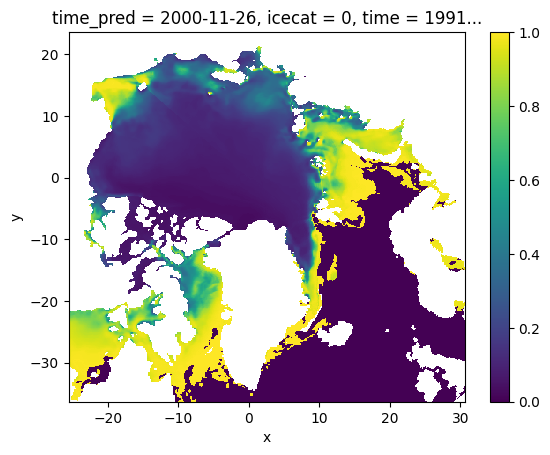

In [76]:
sit_HR.isel(time_pred=330, icecat=0).plot()

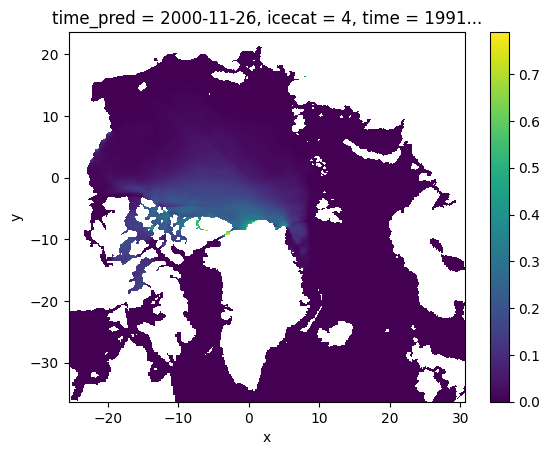

In [77]:
sit_HR.isel(time_pred=330, icecat=4).plot()

# Plot 2D

In [15]:
day = datetime.datetime(1992,11,26)

In [16]:
# fig_dir = 'Leo/results/distri_230531-183924/figures/'
fig_dir = 'Leo/results/distri_240313-190725/figures/'

In [80]:
from importlib import reload
reload(visualize_distri)

<module 'src.visualization.visualize_distri' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_distri.py'>

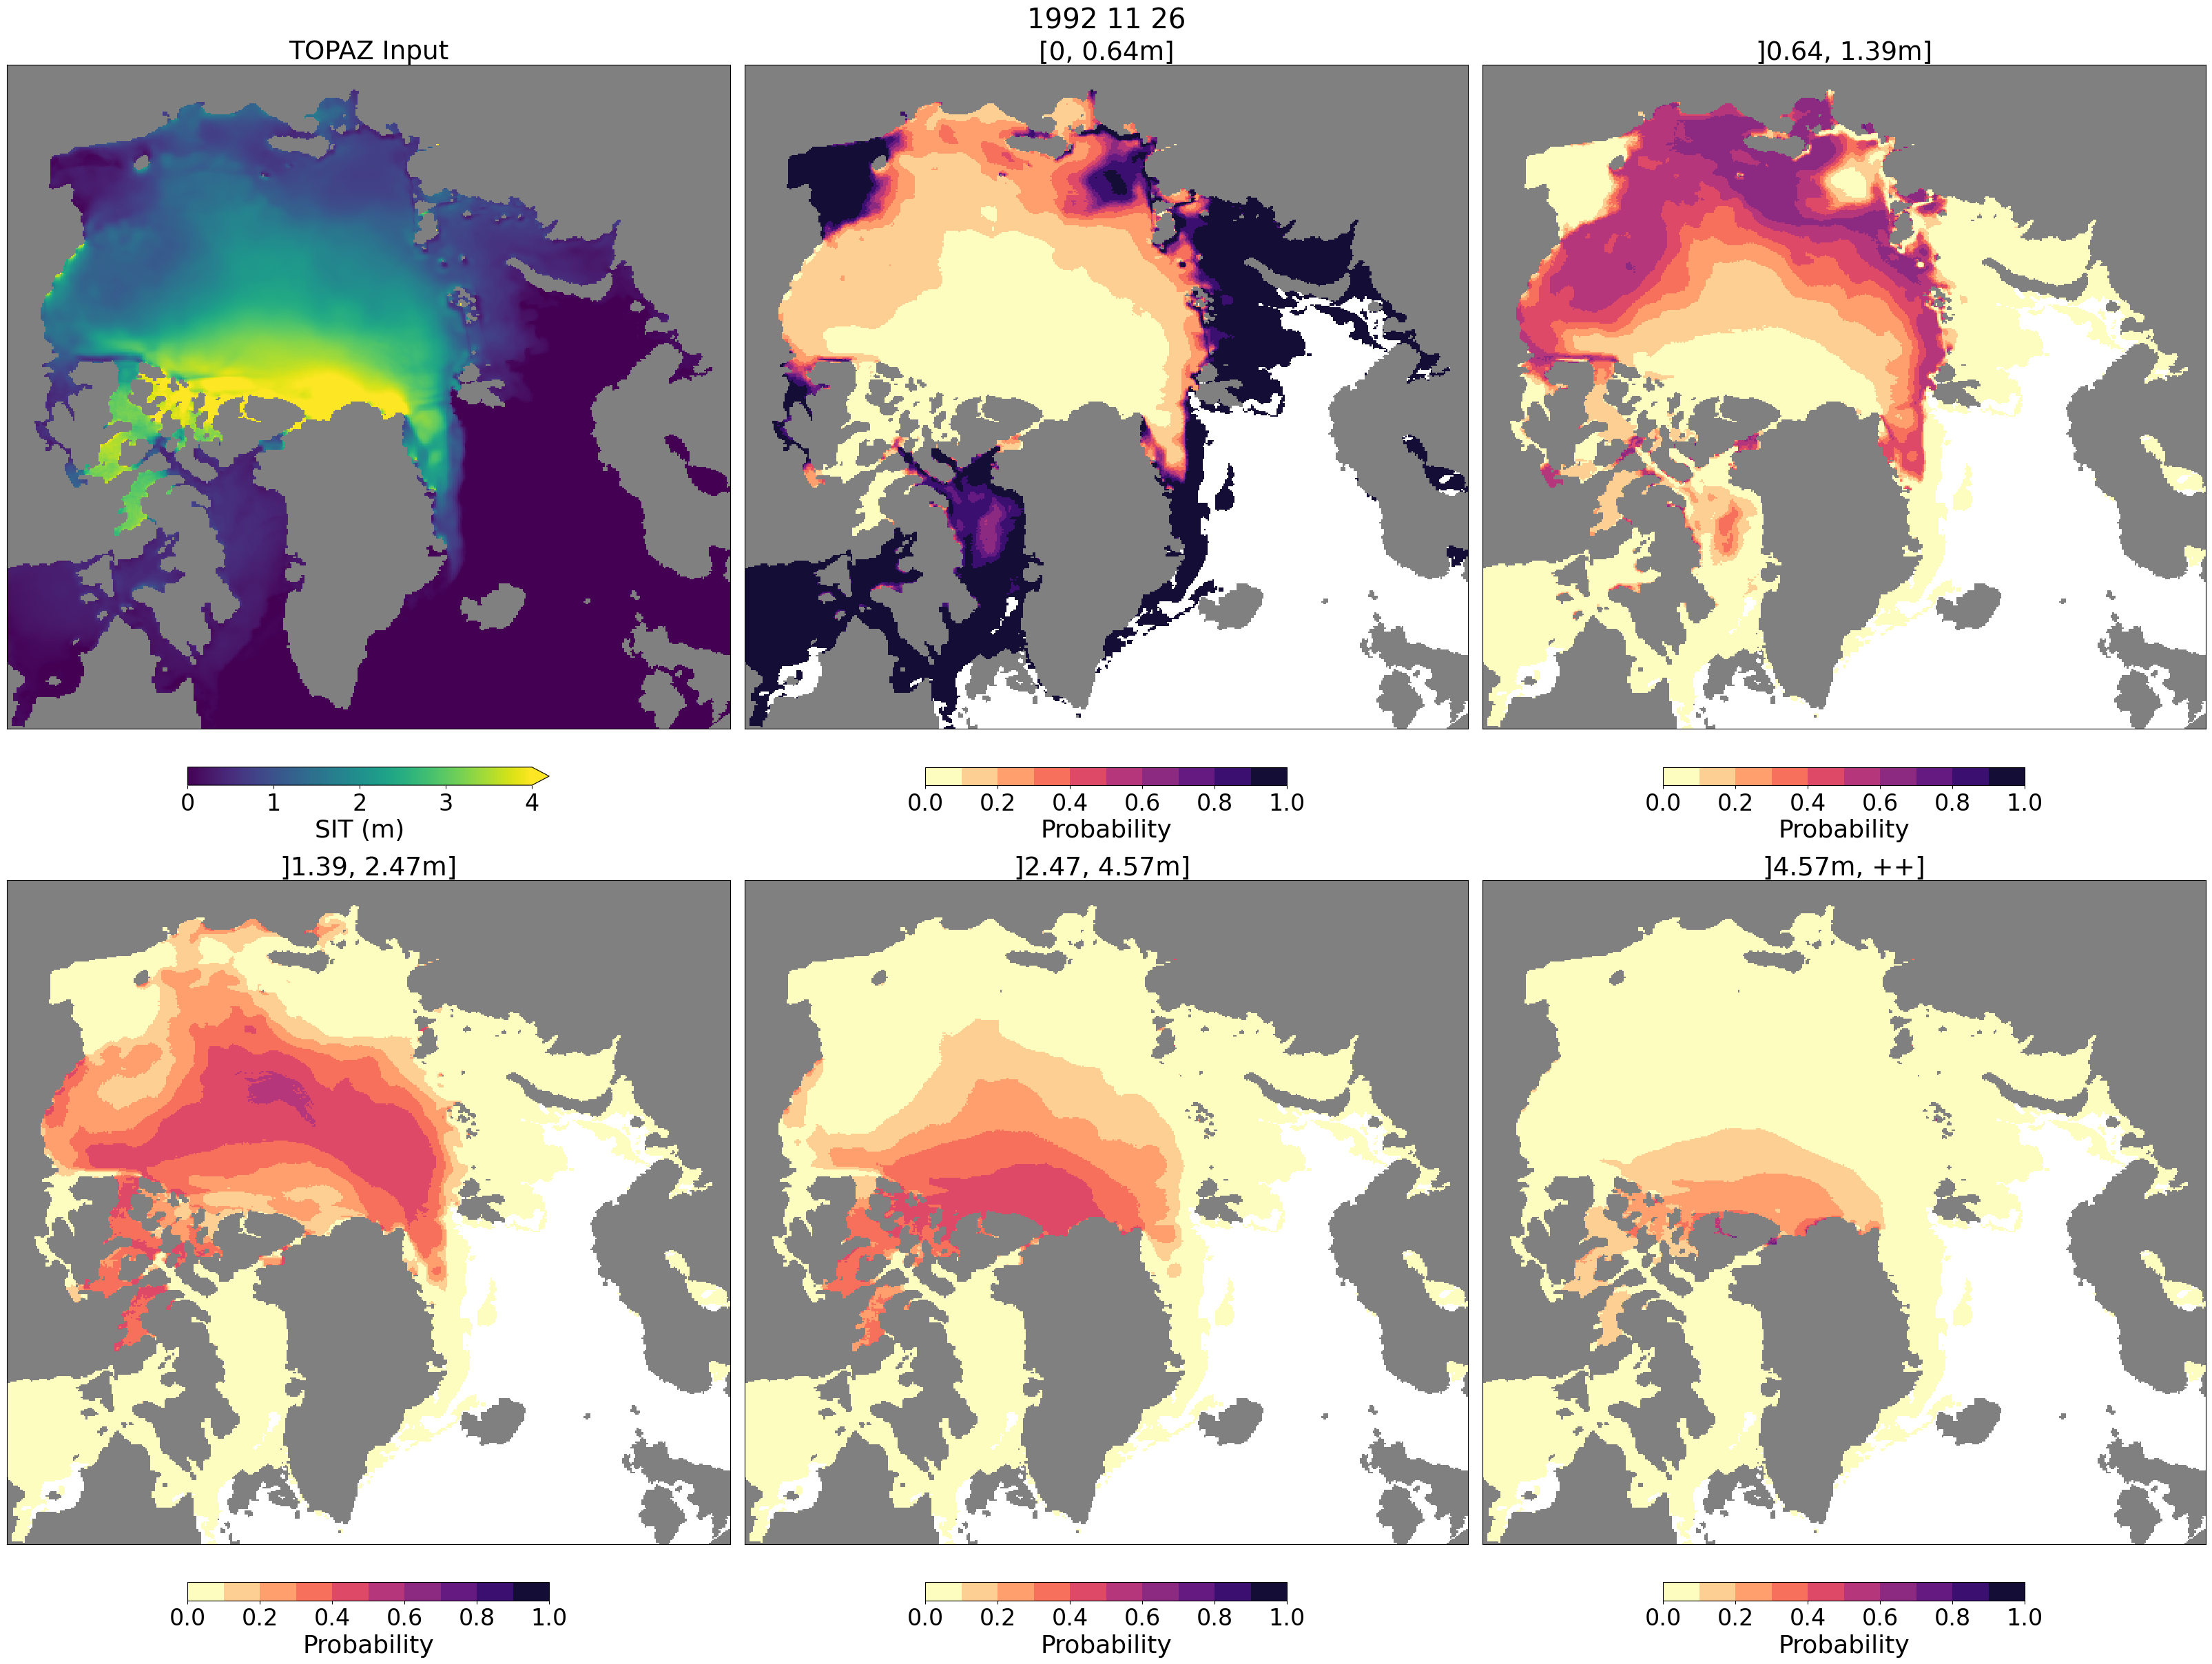

In [17]:
visualize_distri.draw_distri_map(sit_HR, sit_t, day, rootdir, fig_dir, showfig=True, savefig=False)

In [18]:
d1 = datetime.datetime(1992, 1, 1)
d2 = datetime.datetime(1992, 12, 31)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days)])

In [19]:
all_days = np.array([d1 + datetime.timedelta(days=x*15) for x in range(12*2 +1)])

In [25]:
visualize_distri.draw_distri_map_all(sit_HR, sit_t, all_days, rootdir, fig_dir)

Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920101.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920116.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920131.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920215.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920301.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920316.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920331.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920415.png
Saved as : /scratch/project_465000269/edelleo1/Leo/results/distri_240313-190725/figures/SIT_distri_19920

In [49]:
#use colors
list_colors = ['#DB4229', '#29DB33', '#29DBAA', '#2978DB', '#5129DB']

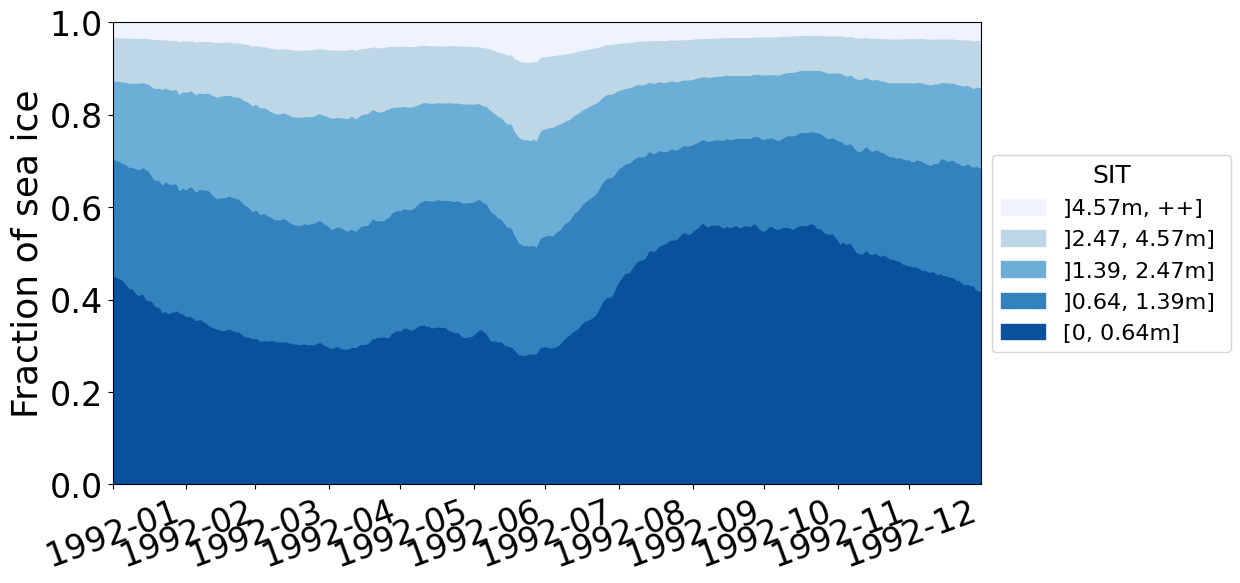

In [24]:
draw_fill_btw(sit_HR)

In [23]:
def draw_fill_btw(sit_HR, tp_model='', savefig=False, showfig=True, rootdir=None, fig_dir=None):
    '''
    Draw the proportion of each ice category in TOPAZ5
    for predicted sea ice distribution by ML
    
    Parameters:
    -----------
    
        tp_model     :     string, TOPAZ version used. Ex: 4b, 4bFR, or ML-corrected: LSTM, RF, CNN
    '''
    
    cat_TP5 = [0, 0.64, 1.39, 2.47, 4.57] # and above 4.57
    # label_cat = ['< 0.64m', '< 1.39m', '< 2.47m', '< 4.57m ', '> 4.57m ']
    label_cat = ['[0, 0.64m]', ']0.64, 1.39m]', ']1.39, 2.47m]', ']2.47, 4.57m] ', ']4.57m, ++]']
    
#     lcolors = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
    lcolors = ['#eff3ff', '#bdd7e7', '#6baed6', '#3182bd', '#08519c'][::-1]
    
    
    
    sumc = np.zeros((sit_HR.shape[0], 5))
    
    
    fig, ax = plt.subplots(nrows=1, figsize=(14,6), constrained_layout=True)
    
    
    for n in range(len(cat_TP5)):
#         sit_HR.isel(icecat=slice(None,n+1)).sum(dim='icecat').plot(ax=axes[0], label=label_cat[n])
#         sit_HR.isel(icecat=slice(None,n+1)).mean(dim=('y','x')).sum(dim='icecat').plot(ax=ax, label=label_cat[n])
        mean_cum = sit_HR.isel(icecat=slice(None,n+1)).sum(dim='icecat')  # .mean(dim=('y','x'))        
        # # remove SIT == 0 before averaging
        mc_plot = mean_cum.where(mean_cum!=0)
        sumc[:, n] = mc_plot.mean(dim=('y','x'))
        # cur.plot(ax=ax, label=label_cat[n])
        
    plt.fill_between(sit_HR.time_pred, np.zeros((sit_HR.shape[0])), sumc[:, 0], label=label_cat[0], color=lcolors[0])
    for n in range(len(cat_TP5)-1):
        plt.fill_between(sit_HR.time_pred, sumc[:, n], sumc[:, n+1], label=label_cat[n+1], color=lcolors[n+1])
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*.8, box.height])
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='SIT',
              loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, title_fontsize=18)
    
        
#     plt.legend(ncol=3, loc='lower center', fontsize=16)
    ax.set_ylabel('Fraction of sea ice')
    ax.set_xlabel('')    
    ax.set_xlim([sit_HR.time_pred[0], sit_HR.time_pred[-1]])
    ax.set_ylim([0, 1])
    ax.set_title('')
    
    # fig.colorbar(imC, ax=axes[0], label='Frequency', extend='max', shrink=0.3, location="top")
#     fig.suptitle(f'TOPAZ{tp_model}', y=0.)
    
    modif_plot.resize(fig, s=24, rx=20)
        
    if savefig:
        filename = f'SIT_distri_fraction_TOPAZ{tp_model}.png'
        plt.savefig(f"{rootdir}{fig_dir}{filename}", bbox_inches='tight')
        print(f'Saved as: {rootdir}{fig_dir}{filename}')
        
    if showfig:
        plt.show()
    
    plt.close()

# ----------------------------------------------------------------

## Ugly: Plot 3D

/tmp/ipykernel_83233/2757208092.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sc, label='SIT (m)')


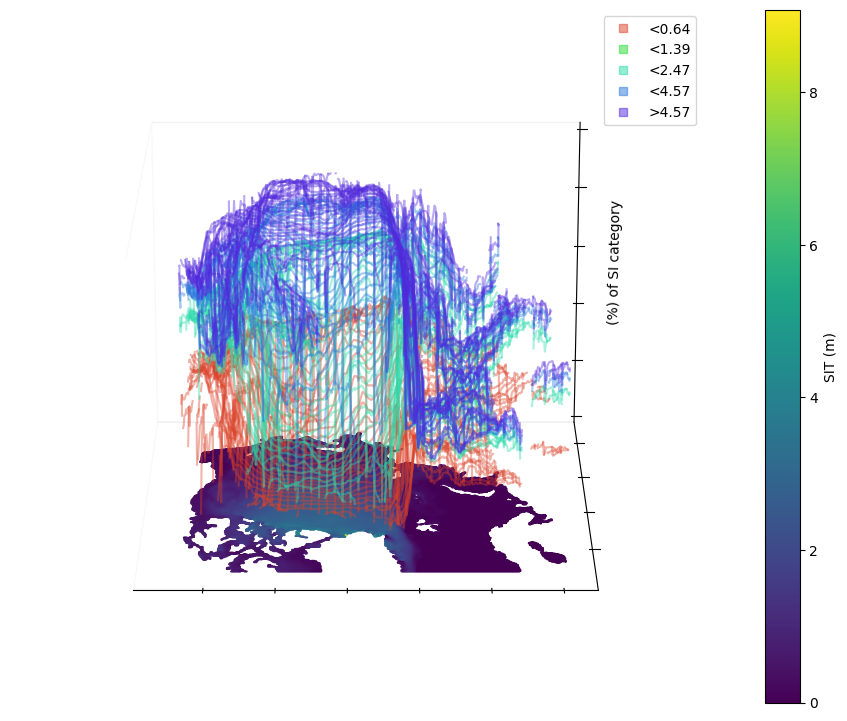

In [72]:
import matplotlib as mpl


fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection ='3d')


#plot 2D meshgrid here
cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=sit.min(), vmax=sit.max() )
colors = cmap(norm(sit))
ax.plot_surface(x, y, np.zeros_like(x), cstride=1, rstride=1, facecolors=colors, shade=False)

list_colors = ['#DB4229', '#29DB33', '#29DBAA', '#2978DB', '#5129DB']

# ax.plot_wireframe(x, y, sit_HR.isel(icecat=0), color='g') # , label='<4.27')
ax.plot_wireframe(x, y, ice0, color=list_colors[0], alpha=.4)
# ax.plot_wireframe(x, y, ice1, alpha=0.4, color=list_colors[1])
ax.plot_wireframe(x, y, ice2, alpha=0.4, color=list_colors[2])
ax.plot_wireframe(x, y, ice3, alpha=0.4, color=list_colors[3])
ax.plot_wireframe(x, y, ice4, alpha=0.4, color=list_colors[4])

# ax.plot_surface(x, y, ice0, alpha=0.5, color=list_colors[0])


# #make a colorbar
sc = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sc.set_array([])
plt.colorbar(sc, label='SIT (m)')


ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# ax.grid(False)
ax.set_zlabel('(%) of SI category')
ax.set_zlim([0, 1])

ax.view_init(20, -90)

# ax.get_xaxis().set_visible(True)
# ax.get_yaxis().set_visible(False)
# ax.set_axis_off()
# ax.get_zaxis().set_visible(True)
# ax.spines['right'].set_visible(True)

ax.grid(False)
# ax.zaxis.grid(True)


# ax.xaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# plt.rcParams['grid.linewidth'] = 1   # change linwidth
# plt.rcParams['grid.color'] = "grey" # change color

# ax.spines['right'].set_visible(False)
# ax.zaxis.grid(True) 

# fake Legend
fake2Dline0 = mpl.lines.Line2D([0],[0], linestyle="none", c=list_colors[0], marker='s', alpha=0.5)
# fake2Dline1 = mpl.lines.Line2D([0],[0], linestyle="none", c=list_colors[1], marker='s', alpha=0.5)
fake2Dline2 = mpl.lines.Line2D([0],[0], linestyle="none", c=list_colors[2], marker='s', alpha=0.5)
fake2Dline3 = mpl.lines.Line2D([0],[0], linestyle="none", c=list_colors[3], marker='s', alpha=0.5)
fake2Dline4 = mpl.lines.Line2D([0],[0], linestyle="none", c=list_colors[4], marker='s', alpha=0.5)


ax.legend([fake2Dline0, fake2Dline1, fake2Dline2, fake2Dline3, fake2Dline4],
          ['<0.64',  '<1.39', '<2.47', '<4.57', '>4.57'], numpoints = 1)


plt.show()